# **Detección de síndrome del ojo seco empleando atributos del estilo de vida de la persona y variables medicas**

Descripción del dataset y de las columnas

## Importar los paquetes necesarios

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [66]:
sns.set_context('notebook')

## Carga de datos

In [67]:
url='https://drive.google.com/uc?export=download&id=1rsinyuJoJesd_UyrLaD0u-ECzJH4PHFA'

In [68]:
df=pd.read_csv(url)
df.head()

,Gender,Age,Sleep duration,Sleep quality,Stress level,Blood pressure,Heart rate,Daily steps,Physical activity,Height,...,Smoking,Medical issue,Ongoing medication,Smart device before bed,Average screen time,Blue-light filter,Discomfort Eye-strain,Redness in eye,Itchiness/Irritation in eye,Dry Eye Disease
0,F,24,9.5,2,1,137/89,67,3000,31,161,...,N,Y,Y,N,8.7,N,Y,Y,N,Y
1,M,39,9.6,2,3,108/64,60,12000,74,164,...,N,Y,Y,N,9.6,Y,N,N,Y,Y
2,F,45,5.4,1,5,134/81,95,12000,93,179,...,N,N,N,Y,4.0,N,Y,N,N,N
3,F,45,5.4,4,5,110/90,78,19000,32,160,...,N,Y,N,N,7.6,N,Y,N,Y,N
4,F,42,5.7,3,2,99/67,72,4000,173,179,...,N,Y,N,N,3.5,N,Y,Y,N,Y


## EDA

El dataset cuenta con 20000 registros y 26 *features* o columnas

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       20000 non-null  object 
 1   Age                          20000 non-null  int64  
 2   Sleep duration               20000 non-null  float64
 3   Sleep quality                20000 non-null  int64  
 4   Stress level                 20000 non-null  int64  
 5   Blood pressure               20000 non-null  object 
 6   Heart rate                   20000 non-null  int64  
 7   Daily steps                  20000 non-null  int64  
 8   Physical activity            20000 non-null  int64  
 9   Height                       20000 non-null  int64  
 10  Weight                       20000 non-null  int64  
 11  Sleep disorder               20000 non-null  object 
 12  Wake up during night         20000 non-null  object 
 13  Feel sleepy duri

La tarea principal que se desea llevar acabo es la detección de síndrome del ojo , por lo cual , la *feature* ```Dry Eye Disease```

### Valores Faltantes

In [70]:
print('Missing Values',df.isna().sum().sort_values(ascending=False)[:20],sep='\n')

Missing Values
Gender                         0
Age                            0
Itchiness/Irritation in eye    0
Redness in eye                 0
Discomfort Eye-strain          0
Blue-light filter              0
Average screen time            0
Smart device before bed        0
Ongoing medication             0
Medical issue                  0
Smoking                        0
Alcohol consumption            0
Caffeine consumption           0
Feel sleepy during day         0
Wake up during night           0
Sleep disorder                 0
Weight                         0
Height                         0
Physical activity              0
Daily steps                    0
dtype: int64


No existen valores faltantes en el dataset

### Estadisticas Descriptivas

In [71]:
df.describe()

,Age,Sleep duration,Sleep quality,Stress level,Heart rate,Daily steps,Physical activity,Height,Weight,Average screen time
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,31.422800,6.998245,2.997250,2.993750,79.912200,10536.900000,90.069750,174.865900,74.891850,5.519885
std,8.103717,1.731723,1.412283,1.407235,11.808279,5752.729186,52.317283,14.719903,14.733839,2.606305
min,18.000000,4.000000,1.000000,1.000000,60.000000,1000.000000,0.000000,150.000000,50.000000,1.000000
25%,24.000000,5.500000,2.000000,2.000000,70.000000,6000.000000,45.000000,162.000000,62.000000,3.300000
50%,31.000000,7.000000,3.000000,3.000000,80.000000,11000.000000,91.000000,175.000000,75.000000,5.500000
75%,39.000000,8.500000,4.000000,4.000000,90.000000,16000.000000,135.000000,188.000000,88.000000,7.800000
max,45.000000,10.000000,5.000000,5.000000,100.000000,20000.000000,180.000000,200.000000,100.000000,10.000000


In [72]:
categorical_features=df.select_dtypes(include='object').columns
numerical_features=df.select_dtypes(include='number').columns

In [76]:
categorical_features.shape

(16,)

In [75]:
numerical_features.shape

(10,)

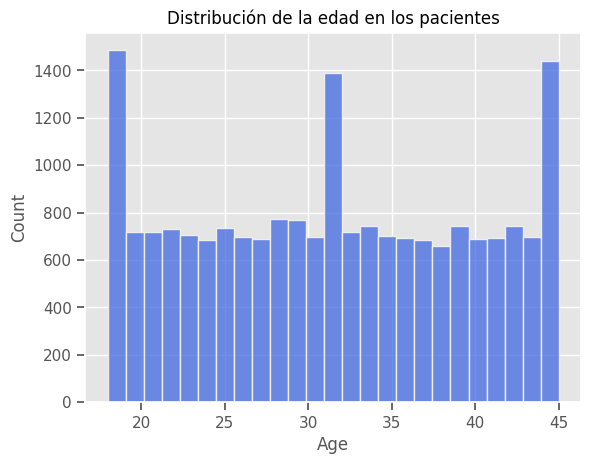

In [ ]:
sns.histplot(df['Age'],color="royalblue")
plt.title('Distribución de la edad en los pacientes')
plt.show()

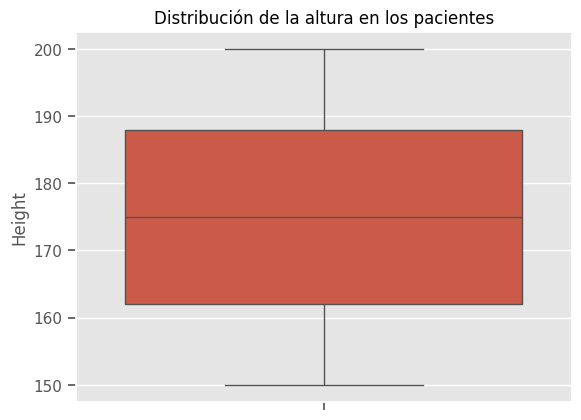

In [ ]:
sns.boxplot(data=df,y='Height')
plt.title('Distribución de la altura en los pacientes')
plt.show()

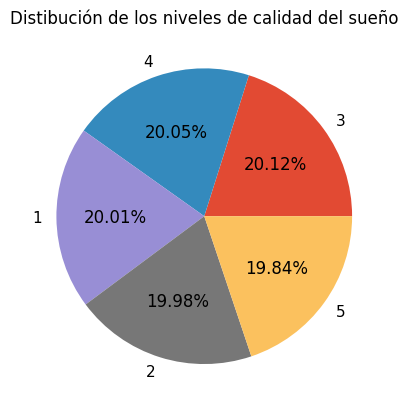

In [ ]:
sleep=df['Sleep quality'].value_counts()
plt.pie(sleep.values,labels=sleep.index,autopct='%1.2f%%')
plt.title('Distibución de los niveles de calidad del sueño')
plt.show()

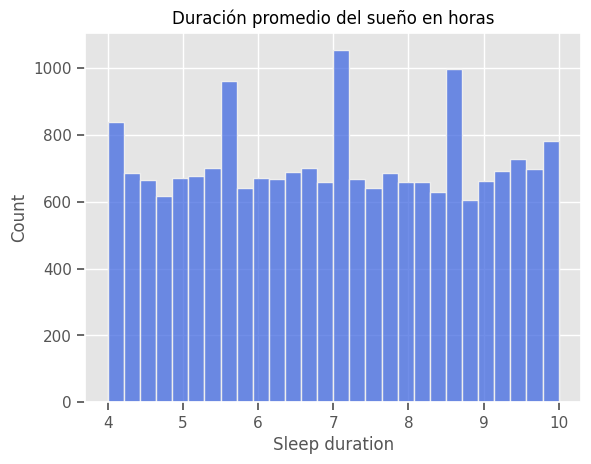

In [ ]:
sns.histplot(data=df,x='Sleep duration',color="royalblue")
plt.title('Duración promedio del sueño en horas')
plt.show()

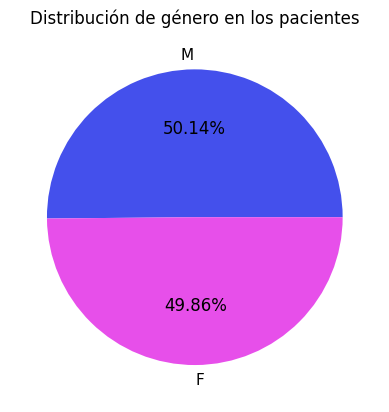

In [ ]:
val_per_gender=df['Gender'].value_counts()
plt.pie(val_per_gender.values,labels=val_per_gender.index,autopct='%1.2f%%',colors=["#4450ec","#e74fea"])
plt.title('Distribución de género en los pacientes')
plt.show()

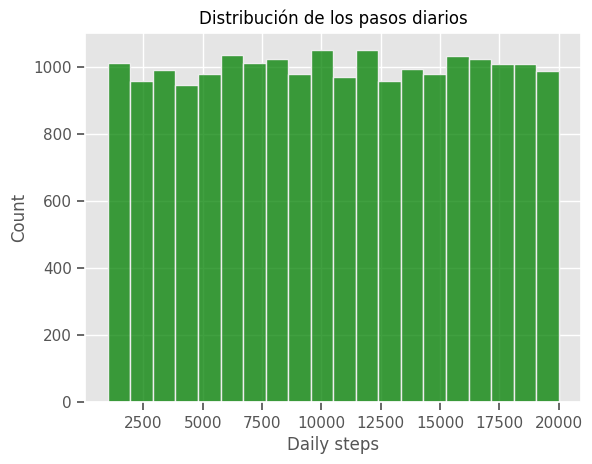

In [ ]:
sns.histplot(df['Daily steps'],bins=20,color="green")
plt.title('Distribución de los pasos diarios')
plt.show()

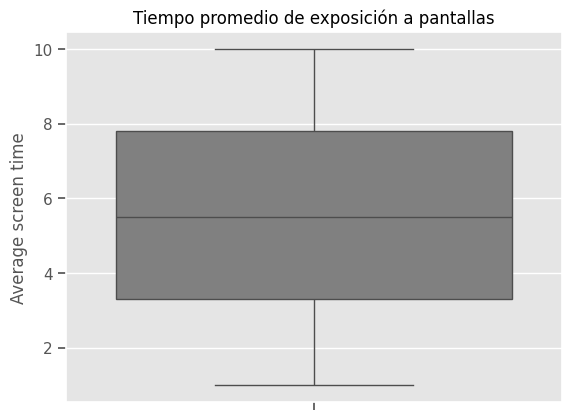

In [ ]:
sns.boxplot(data=df,y='Average screen time',color='grey')
plt.title('Tiempo promedio de exposición a pantallas')
plt.show()

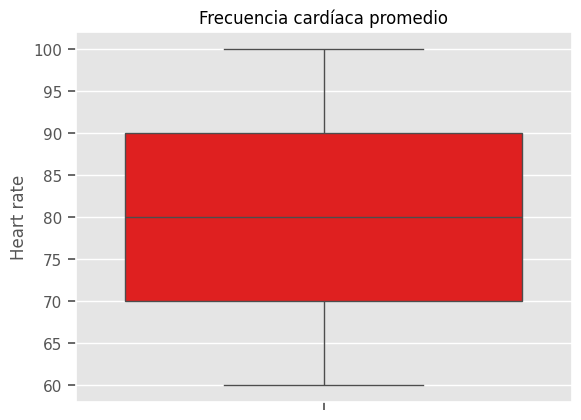

In [ ]:
sns.boxplot(data=df,y='Heart rate',color="red")
plt.title('Frecuencia cardíaca promedio')
plt.show()

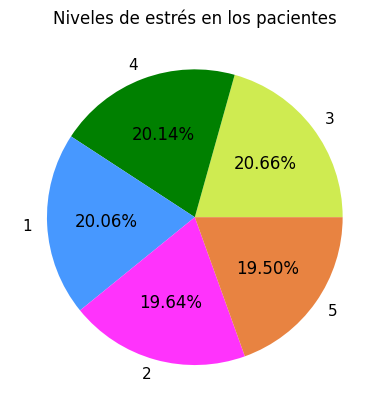

In [ ]:
stress=df['Stress level'].value_counts()
plt.pie(stress.values,labels=stress.index,autopct='%1.2f%%',colors=['#cfeb51','green','#4798ff','#ff33fc','#e88341'])
plt.title('Niveles de estrés en los pacientes')
plt.show()

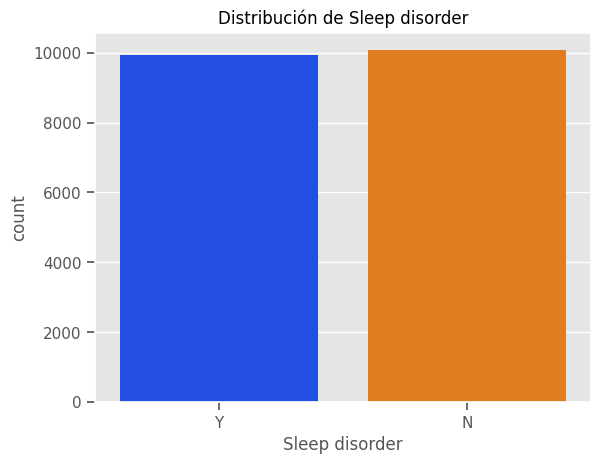

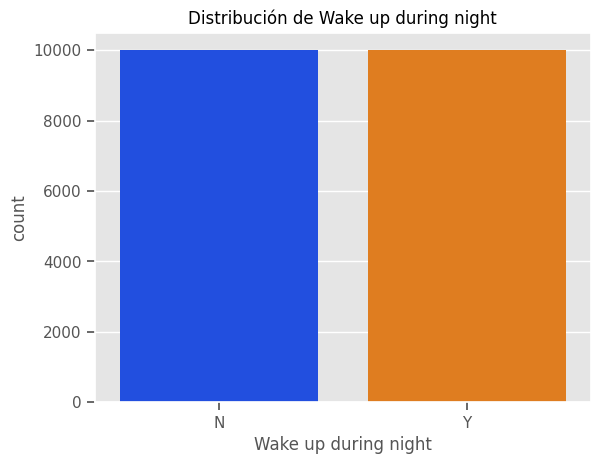

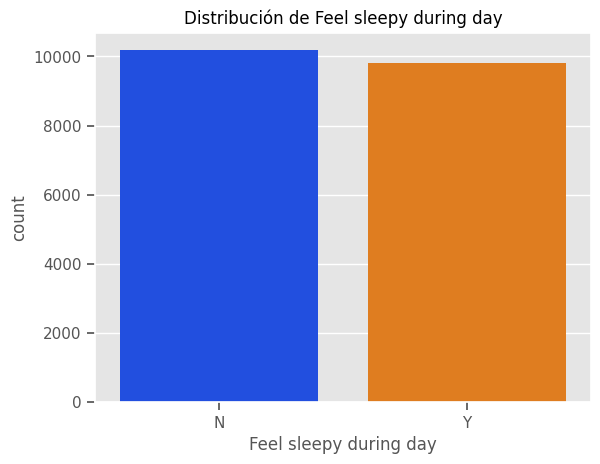

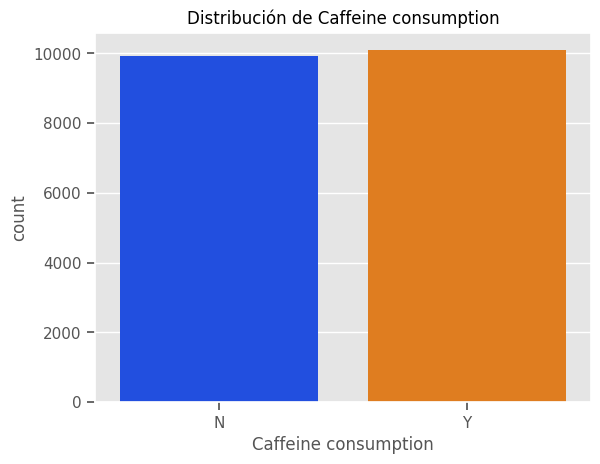

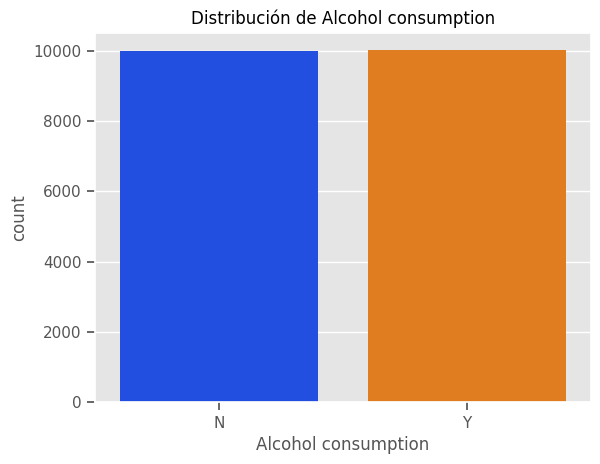

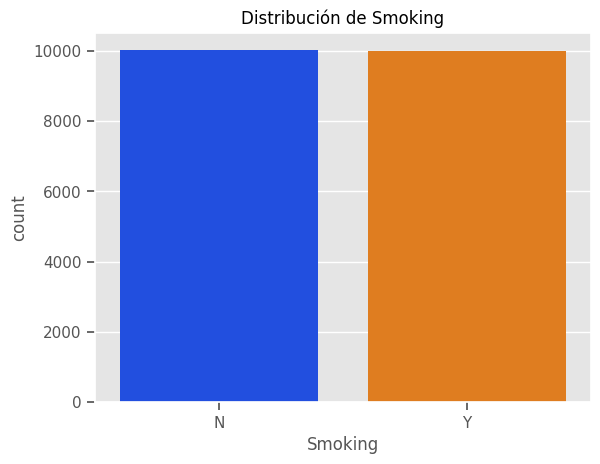

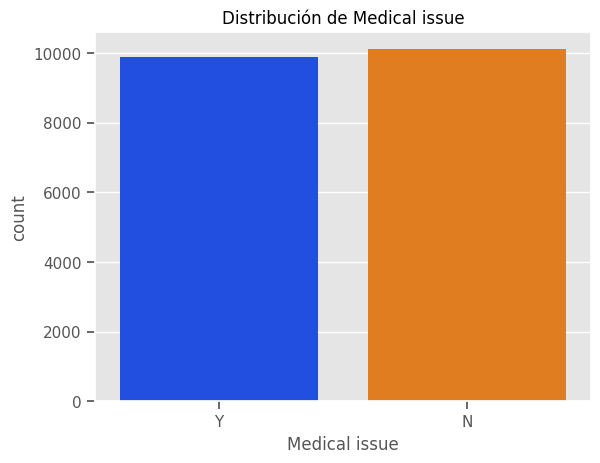

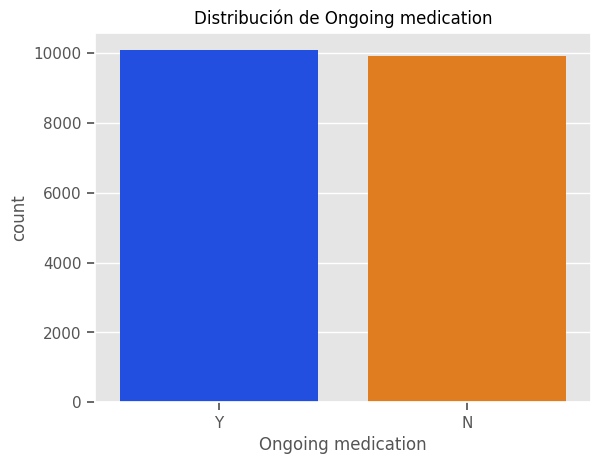

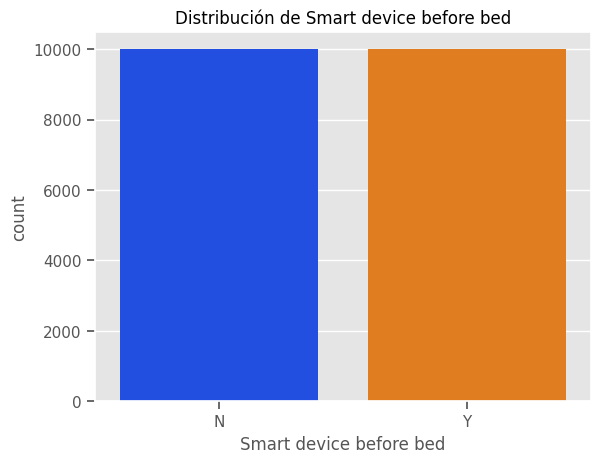

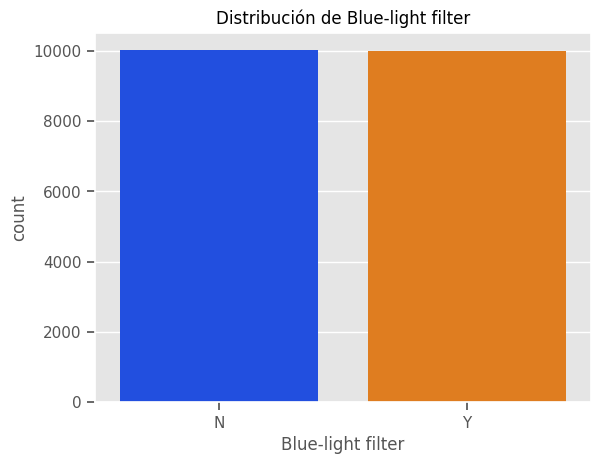

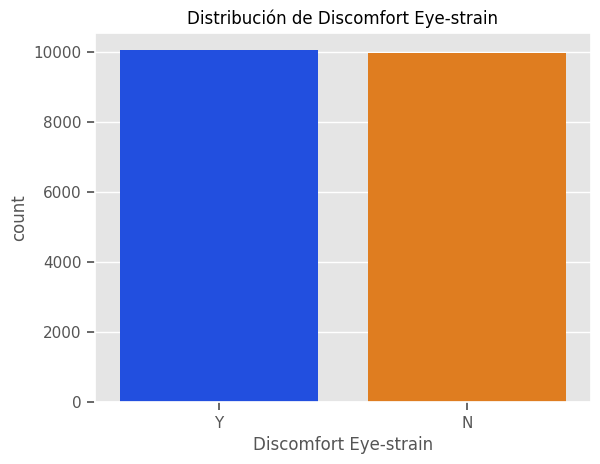

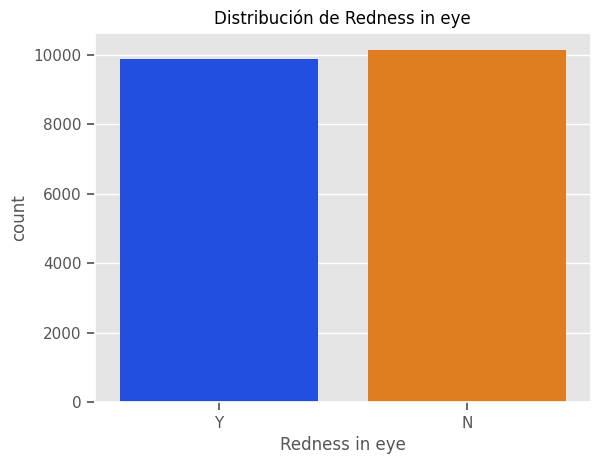

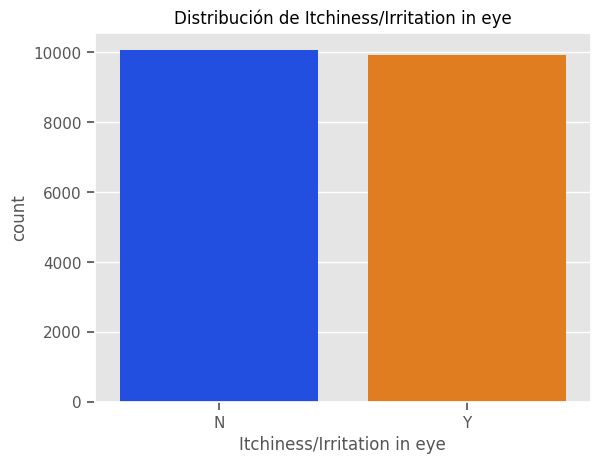

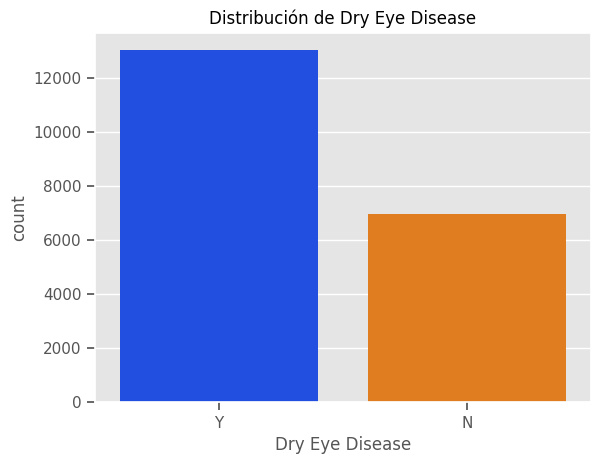

In [ ]:
for elem in categorical_features:
    if elem!='Gender' and elem!='Blood pressure':
        sns.countplot(data=df,x=elem,hue=elem,legend=False,palette='bright')
        plt.title(f'Distribución de {elem}')
        plt.show()

Trabajo Adicional a la entrega 1

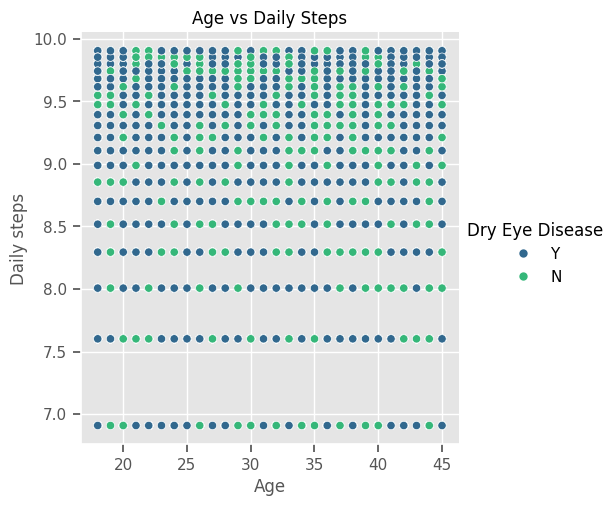

In [ ]:
steps_log=np.log1p(df['Daily steps'])
sns.relplot(x='Age',y=steps_log,data=df,hue='Dry Eye Disease',palette='viridis')
plt.title('Age vs Daily Steps')
plt.show()

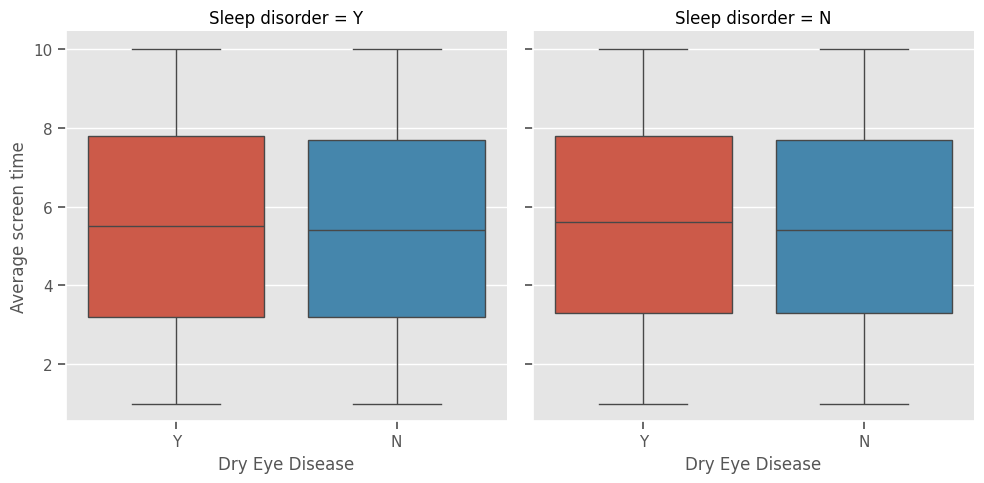

In [ ]:
sns.catplot(data=df,y='Average screen time',x='Dry Eye Disease',hue='Dry Eye Disease',col='Sleep disorder',kind='box')
plt.show()

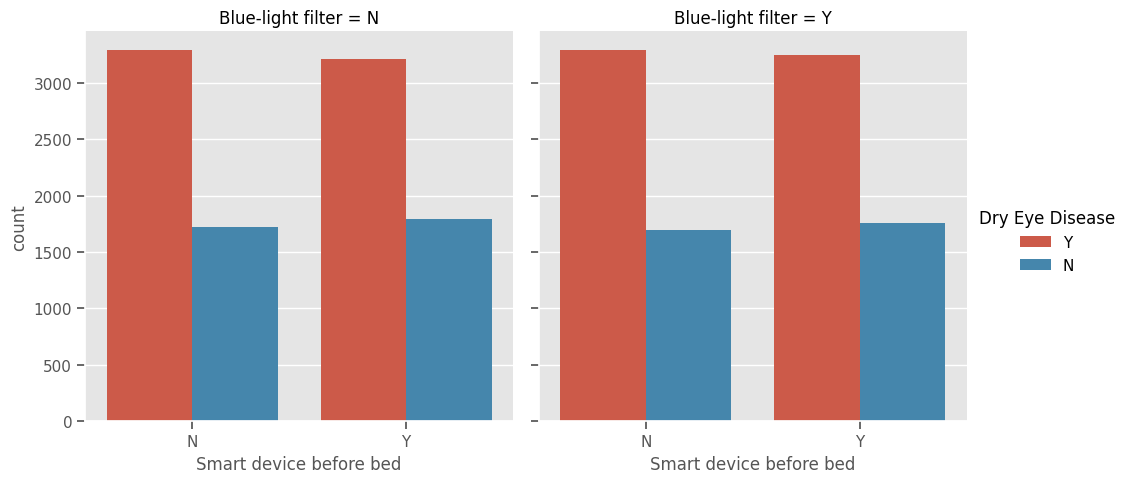

In [ ]:
sns.catplot(data=df,x='Smart device before bed',kind='count',col='Blue-light filter',hue='Dry Eye Disease')
plt.show()

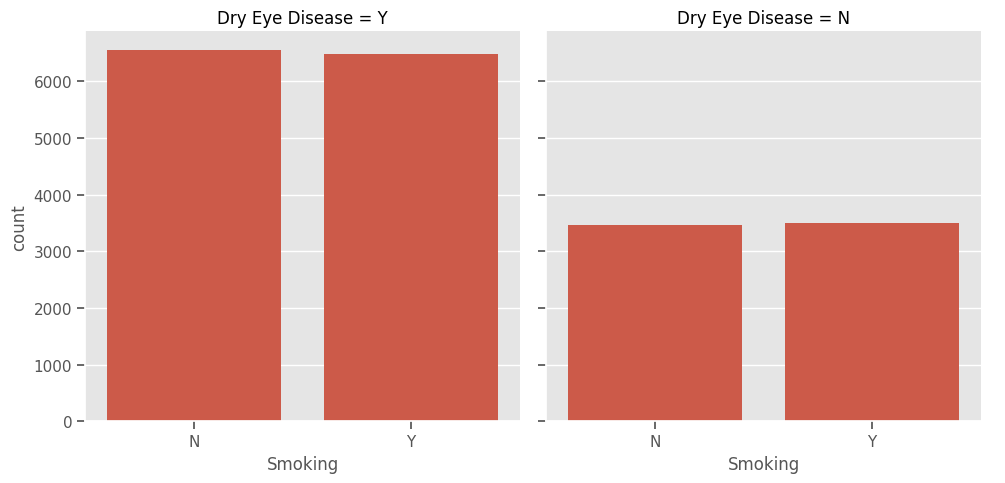

In [ ]:
sns.catplot(data=df,x='Smoking',kind='count',col='Dry Eye Disease')
plt.show()

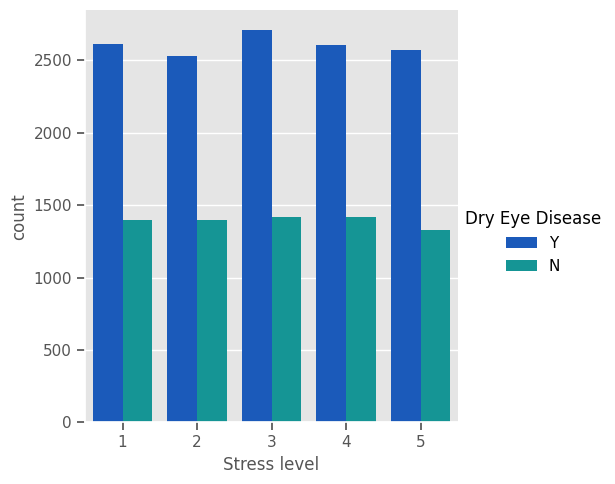

In [ ]:
sns.catplot(x='Stress level',kind='count',data=df,hue='Dry Eye Disease',palette='winter')
plt.show()

### Feature Engineering

In [ ]:
df[['Systolic_BP','Diastolic_BP']]=df['Blood pressure'].str.split('/',expand=True)

In [ ]:
df[['Systolic_BP','Diastolic_BP']]=df[['Systolic_BP','Diastolic_BP']].astype(int)
df[['Systolic_BP','Diastolic_BP']].describe()

,Systolic_BP,Diastolic_BP
count,20000.000000,20000.000000
mean,114.985450,74.999300
std,14.725589,8.975034
min,90.000000,60.000000
25%,102.000000,67.000000
50%,115.000000,75.000000
75%,128.000000,83.000000
max,140.000000,90.000000


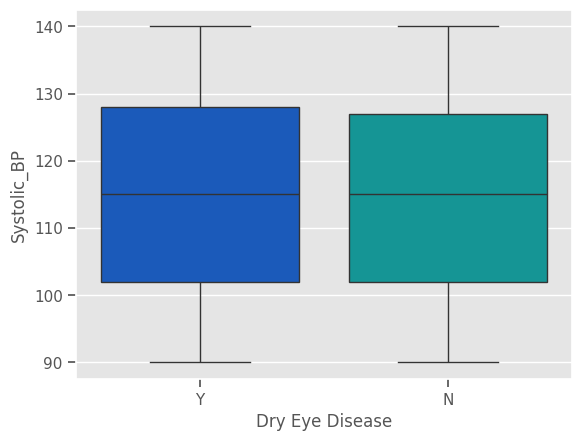

In [ ]:
sns.boxplot(data=df,x='Dry Eye Disease',y='Systolic_BP',palette='winter',hue='Dry Eye Disease')
plt.show()

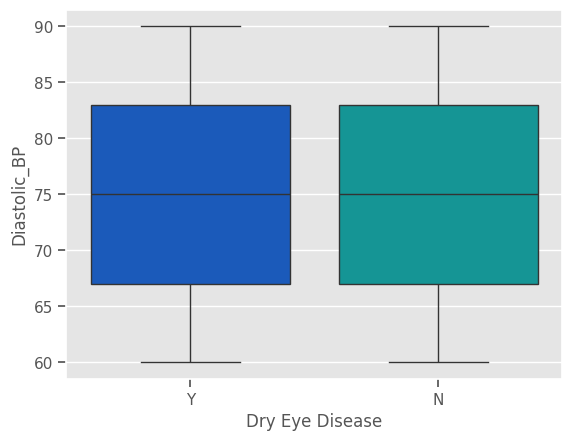

In [ ]:
sns.boxplot(data=df,x='Dry Eye Disease',y='Diastolic_BP',palette='winter',hue='Dry Eye Disease')
plt.show()

In [ ]:
df.pivot_table(index='Dry Eye Disease',values=['Physical activity','imc','Sleep quality','Age','Heart rate'],aggfunc='mean')

,Age,Heart rate,Physical activity,Sleep quality,imc
Dry Eye Disease,,,,,
N,31.364498,79.945857,90.305185,3.006894,24.960062
Y,31.453939,79.894224,89.944006,2.992099,25.059444
